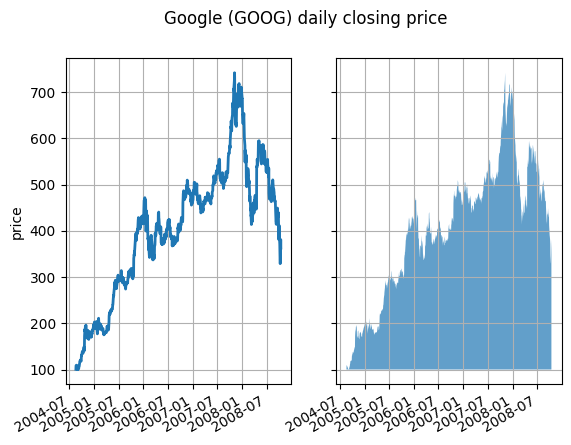

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook


# load up some sample financial data
r = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
     .view(np.recarray))
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r.close.min()

ax1.plot(r.date, r.close, lw=2)
ax2.fill_between(r.date, pricemin, r.close, alpha=0.7)

for ax in ax1, ax2:
    ax.grid(True)

ax1.set_ylabel('price')
for label in ax2.get_yticklabels():
    label.set_visible(False)

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

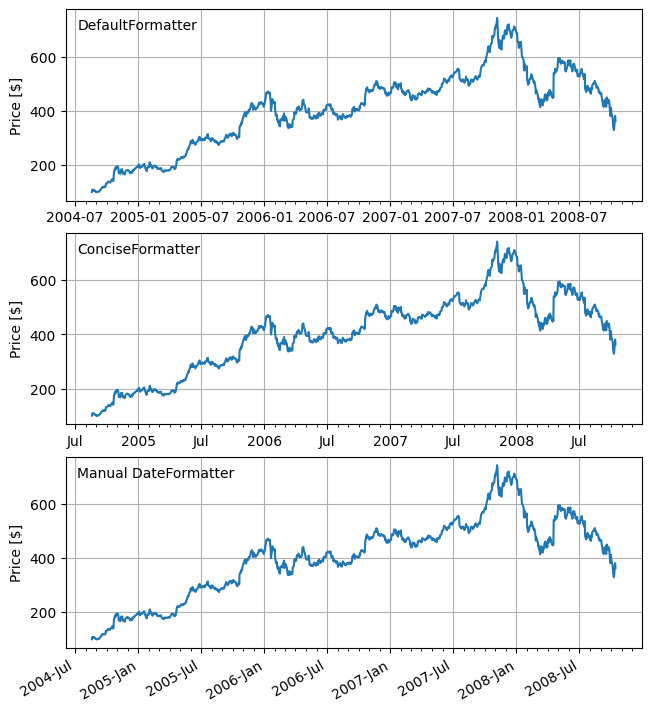

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), constrained_layout=True)
# common to all three:
for ax in axs:
    ax.plot('date', 'adj_close', data=data)
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel(r'Price [\$]')

# different formats:
ax = axs[0]
ax.set_title('DefaultFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')

ax = axs[1]
ax.set_title('ConciseFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax = axs[2]
ax.set_title('Manual DateFormatter', loc='left', y=0.85, x=0.02,
             fontsize='medium')
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

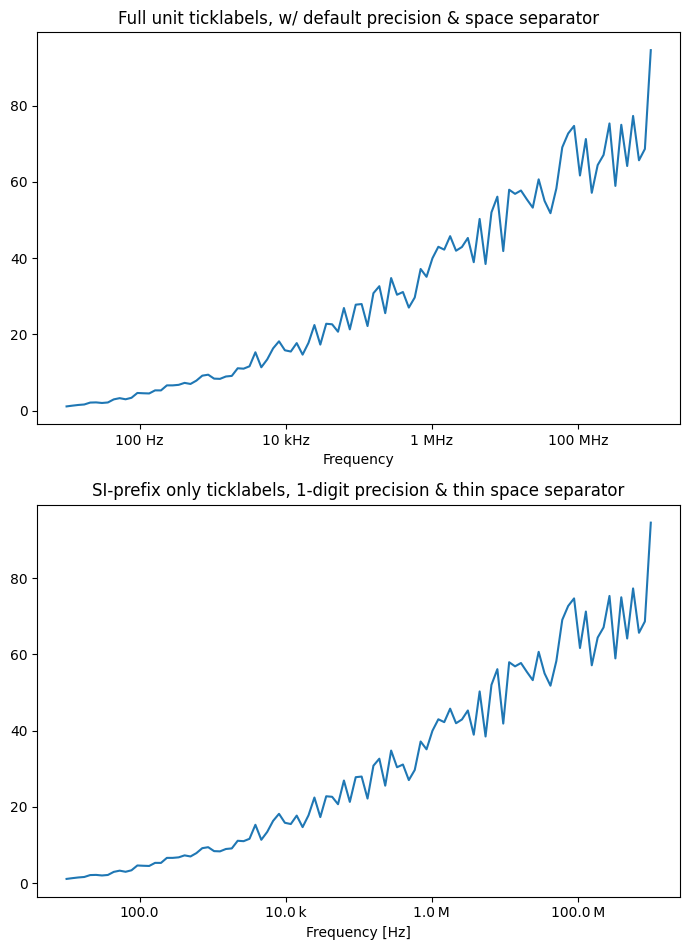

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import EngFormatter

# Fixing random state for reproducibility
prng = np.random.RandomState(19680801)

# Create artificial data to plot.
# The x data span over several decades to demonstrate several SI prefixes.
xs = np.logspace(1, 9, 100)
ys = (0.8 + 0.4 * prng.uniform(size=100)) * np.log10(xs)**2

# Figure width is doubled (2*6.4) to display nicely 2 subplots side by side.
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(7, 9.6))
for ax in (ax0, ax1):
    ax.set_xscale('log')

# Demo of the default settings, with a user-defined unit label.
ax0.set_title('Full unit ticklabels, w/ default precision & space separator')
formatter0 = EngFormatter(unit='Hz')
ax0.xaxis.set_major_formatter(formatter0)
ax0.plot(xs, ys)
ax0.set_xlabel('Frequency')

# Demo of the options `places` (number of digit after decimal point) and
# `sep` (separator between the number and the prefix/unit).
ax1.set_title('SI-prefix only ticklabels, 1-digit precision & '
              'thin space separator')
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
ax1.xaxis.set_major_formatter(formatter1)
ax1.plot(xs, ys)
ax1.set_xlabel('Frequency [Hz]')

plt.tight_layout()
plt.show()